In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree


In [3]:
df=pd.read_csv("/content/ecosystem_data.csv")

In [4]:
df.head()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded


In [6]:
df.isnull().sum()

,0
water_quality,0
air_quality_index,0
biodiversity_index,0
vegetation_cover,0
soil_ph,0
ecosystem_health,0


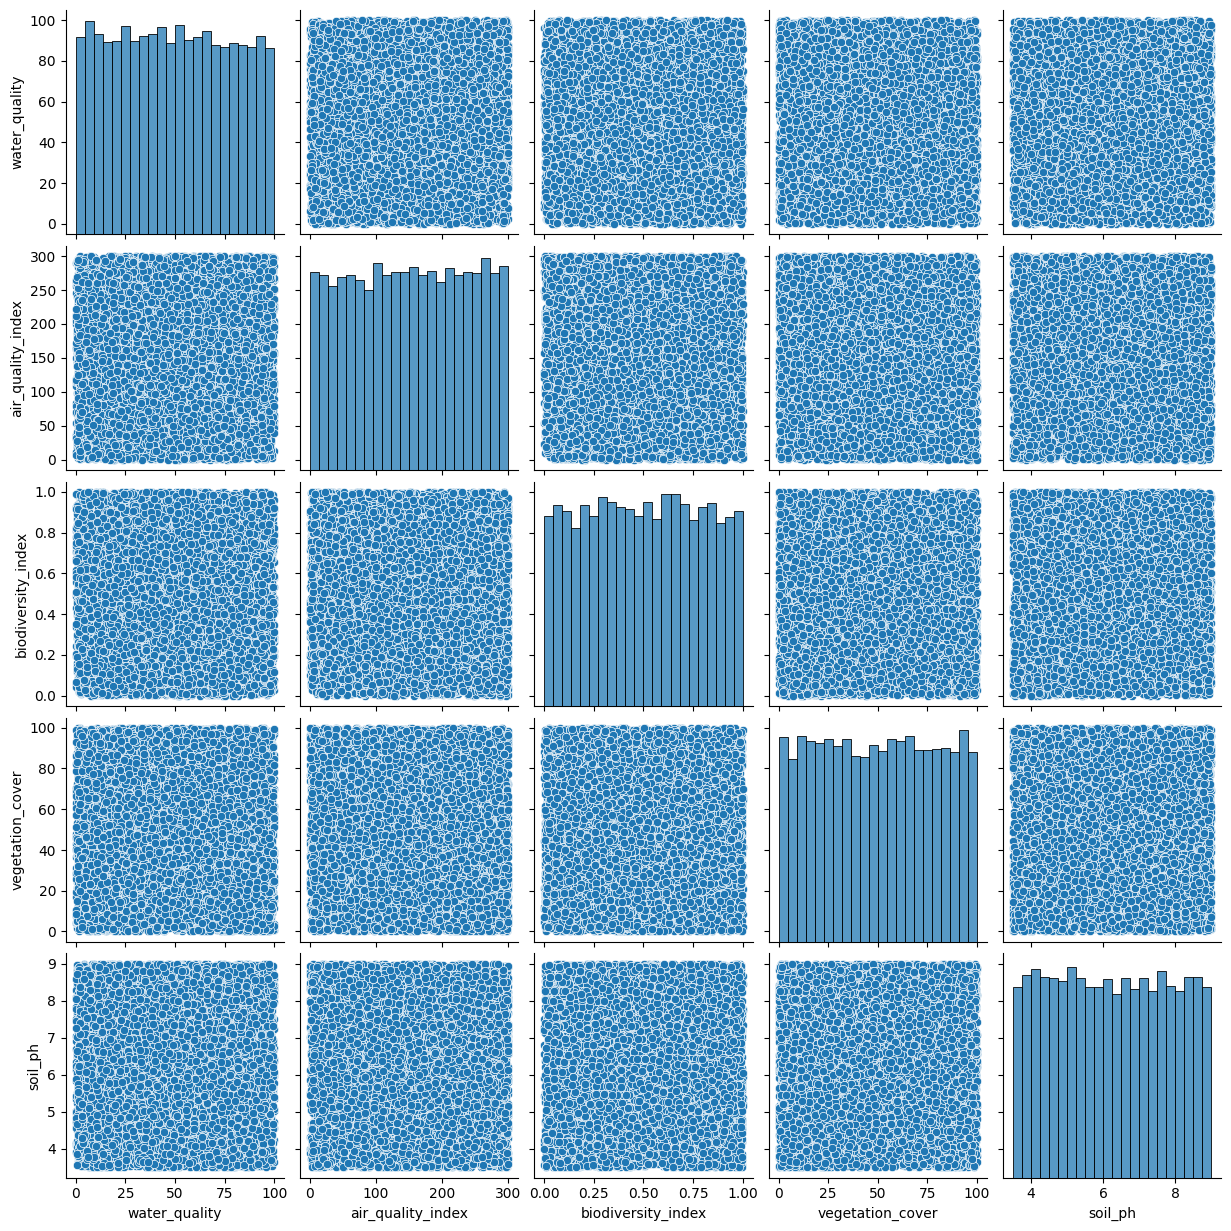

In [8]:
sns.pairplot(df)

<Axes: >

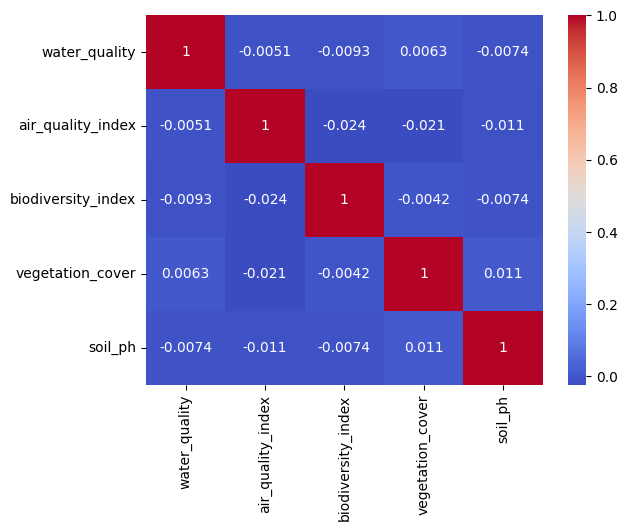

In [9]:
data=df.drop(['ecosystem_health'],axis=1)
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')


<Axes: xlabel='count', ylabel='ecosystem_health'>

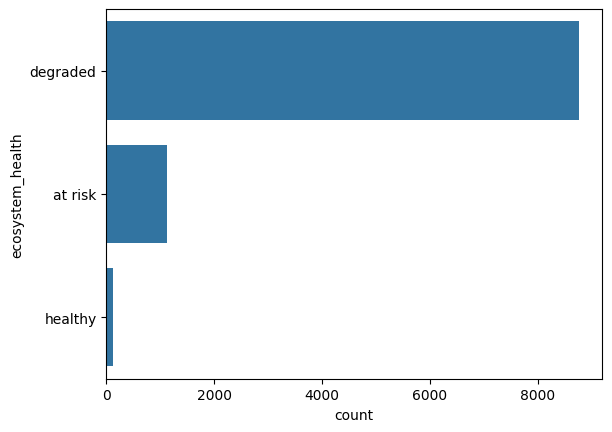

In [10]:
sns.countplot(df['ecosystem_health'])

<Axes: xlabel='ecosystem_health', ylabel='count'>

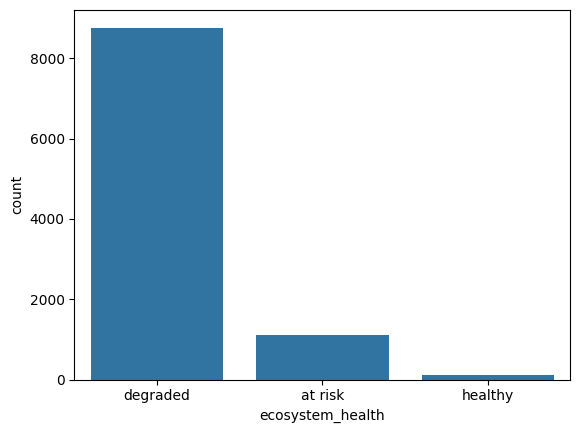

In [15]:
sns.countplot(x="ecosystem_health",data=df)

In [16]:
df.columns

Index(['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph', 'ecosystem_health'],
      dtype='object')

In [18]:
X=df[['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph']]
Y=df['ecosystem_health']


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [23]:
y_pred=model.predict(X_test)

In [24]:
print(y_pred)

['degraded' 'degraded' 'at risk' ... 'degraded' 'degraded' 'degraded']


In [25]:
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

0.9895


In [26]:
conf_matrix=confusion_matrix(Y_test,y_pred)
print(conf_matrix)

[[ 222    0    0]
 [   0 1757    0]
 [  21    0    0]]


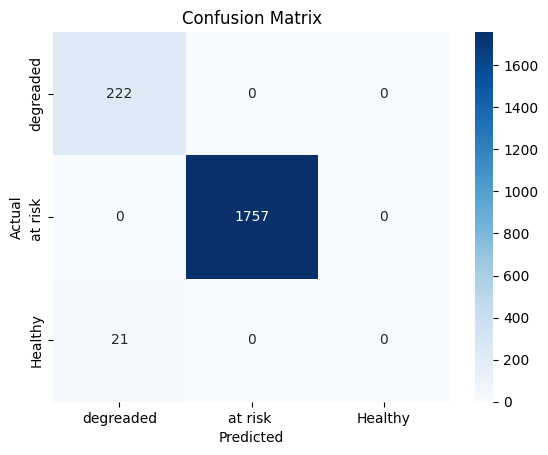

In [30]:
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['degreaded','at risk ','Healthy'],
            yticklabels=['degreaded','at risk ','Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(classification_report(Y_test,y_pred,target_names=['Degraded','at risk ','Healdty']))

              precision    recall  f1-score   support

    Degraded       0.91      1.00      0.95       222
    at risk        1.00      1.00      1.00      1757
     Healdty       0.00      0.00      0.00        21

    accuracy                           0.99      2000
   macro avg       0.64      0.67      0.65      2000
weighted avg       0.98      0.99      0.98      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
df=pd.read_csv("/content/drug200.csv")

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [35]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


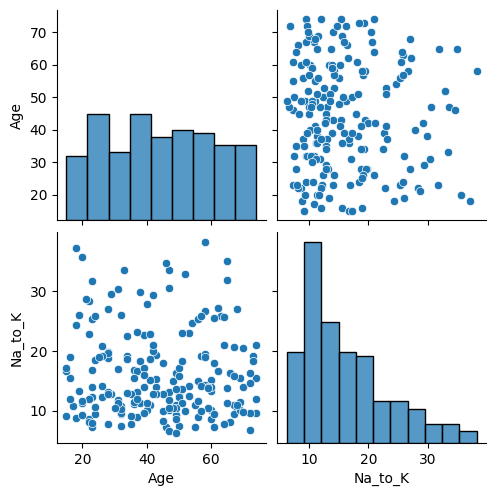

In [36]:
sns.pairplot(df)

<Axes: >

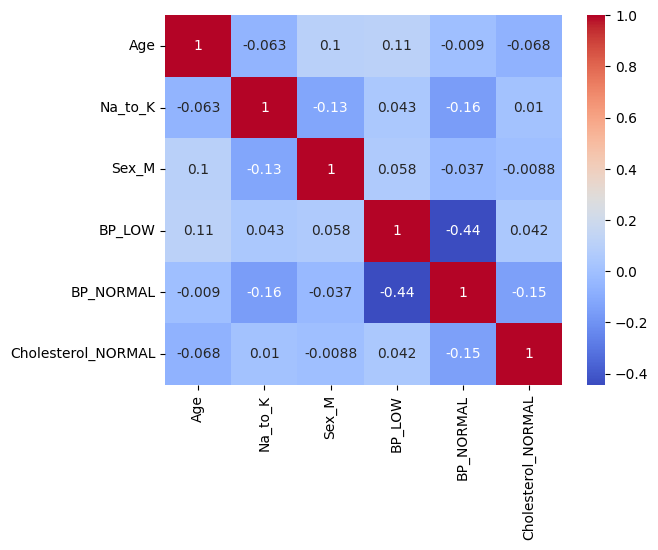

In [39]:
data=df.drop(['Drug'],axis=1)
# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

correlation_matrix=data_encoded.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

<Axes: xlabel='count', ylabel='Drug'>

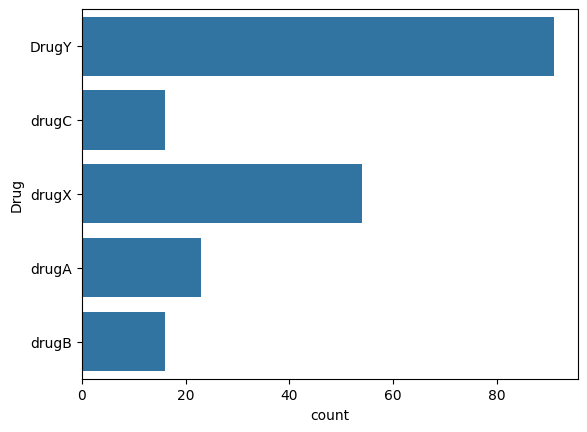

In [40]:
sns.countplot(df['Drug'])

<Axes: xlabel='Drug', ylabel='count'>

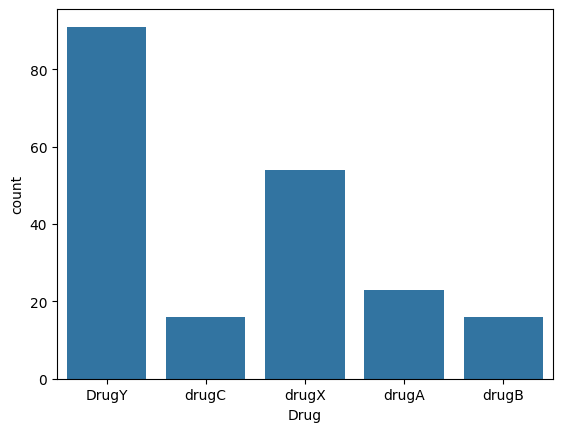

In [41]:
sns.countplot(x="Drug",data=df)

In [42]:
df.columns



Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [46]:
X=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y=df['Drug']
X = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [49]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
y_pred=model.predict(X_test)

In [51]:
print(y_pred)

['drugX' 'DrugY' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'DrugY' 'drugA' 'drugA' 'DrugY' 'drugA' 'drugX'
 'drugX' 'DrugY' 'drugA' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugA' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'drugA']


In [52]:
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

0.8


In [53]:
conf_matrix=confusion_matrix(Y_test,y_pred)
print(conf_matrix)

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  0  5]
 [ 0  0  0  0 11]]


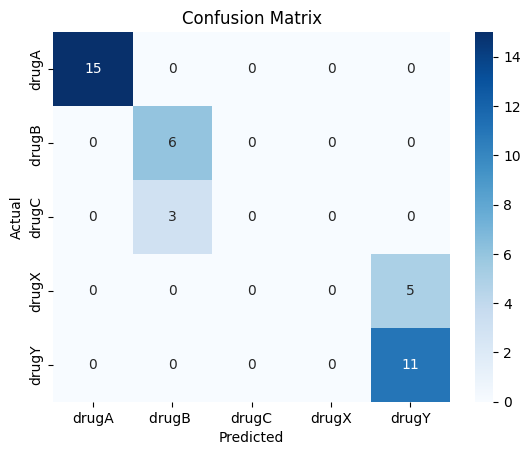

In [55]:
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['drugA','drugB ','drugC','drugX','drugY'],
            yticklabels=['drugA','drugB ','drugC','drugX','drugY'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
print(classification_report(Y_test,y_pred,target_names=['drugA','drugB ','drugC','drugX','drugY']))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        15
      drugB        0.67      1.00      0.80         6
       drugC       0.00      0.00      0.00         3
       drugX       0.00      0.00      0.00         5
       drugY       0.69      1.00      0.81        11

    accuracy                           0.80        40
   macro avg       0.47      0.60      0.52        40
weighted avg       0.66      0.80      0.72        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
